In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [15]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [16]:
encode = LabelEncoder()
for column in df.columns:
    df[column] = encode.fit_transform(df[column])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
X = df.drop(columns=['class'],axis=1)
y = df['class']

In [18]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
model1 = RandomForestClassifier()
model2 = AdaBoostClassifier()

models = [model1,model2]

In [20]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    fsc = f1_score(y_test,y_pred)
    creport = classification_report(y_test,y_pred)
    print(f"Accuracy for {model} : {acc}\nF1 Score for {model} :{fsc}\nConfusion matrix for {model}: \n{creport}")
    print("*"*100)

Accuracy for RandomForestClassifier() : 1.0
F1 Score for RandomForestClassifier() :1.0
Confusion matrix for RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

****************************************************************************************************
Accuracy for AdaBoostClassifier() : 0.9926144756277696
F1 Score for AdaBoostClassifier() :0.9923741738688358
Confusion matrix for AdaBoostClassifier(): 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1040
           1       1.00      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg

In [21]:
# Plot feature importance
feature_importance = model1.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
4                       odor    0.142664
7                  gill-size    0.118771
19         spore-print-color    0.110943
8                 gill-color    0.099141
10                stalk-root    0.066408
20                population    0.064834
18                 ring-type    0.057220
3                    bruises    0.056083
12  stalk-surface-below-ring    0.052107
11  stalk-surface-above-ring    0.047795
6               gill-spacing    0.047505
21                   habitat    0.035078
9                stalk-shape    0.023826
17               ring-number    0.017848
2                  cap-color    0.016159
13    stalk-color-above-ring    0.015397
1                cap-surface    0.010292
14    stalk-color-below-ring    0.008412
0                  cap-shape    0.004724
5            gill-attachment    0.002975
16                veil-color    0.001819
15                 veil-type    0.000000


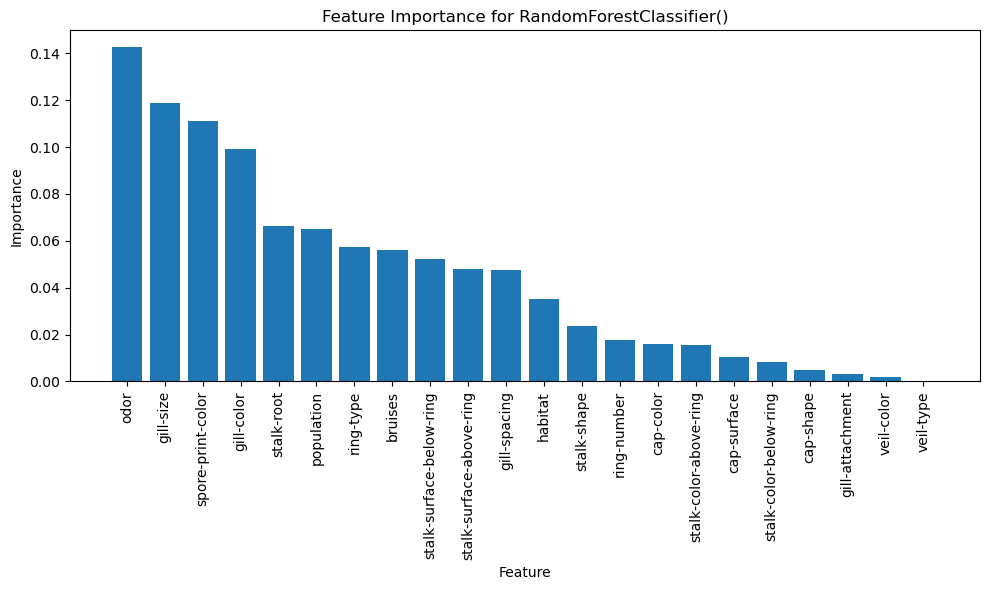

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importance for {model1}')
plt.tight_layout()
plt.show()


In [23]:
feature_importance = model2.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                     Feature  Importance
4                       odor    0.527364
19         spore-print-color    0.112284
8                 gill-color    0.061387
6               gill-spacing    0.052749
10                stalk-root    0.049689
21                   habitat    0.033826
7                  gill-size    0.032533
2                  cap-color    0.031174
11  stalk-surface-above-ring    0.025793
14    stalk-color-below-ring    0.025299
9                stalk-shape    0.023418
20                population    0.017299
12  stalk-surface-below-ring    0.007185
1                cap-surface    0.000000
5            gill-attachment    0.000000
3                    bruises    0.000000
0                  cap-shape    0.000000
13    stalk-color-above-ring    0.000000
17               ring-number    0.000000
16                veil-color    0.000000
15                 veil-type    0.000000
18                 ring-type    0.000000


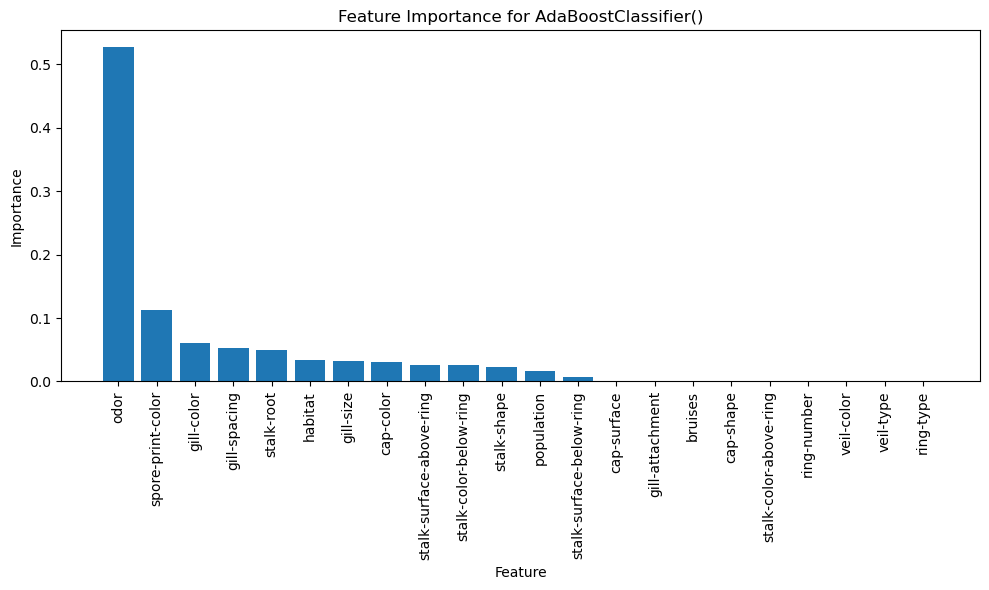

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importance for {model2}')
plt.tight_layout()
plt.show()


## employee attrition random forest

In [25]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
df = pd.read_csv(r"WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
#Extracting the Numeric and Categorical features
df_num = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_cat = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print("Shape of Numeric: ",df_num.shape)
print("Shape of Categorical: ",df_cat.shape)

Shape of Numeric:  (1470, 26)
Shape of Categorical:  (1470, 9)


In [28]:
#Dropping 'Attrition' from df_cat before encoding
df_cat = df_cat.drop(['Attrition'], axis=1) 

#Encoding using Pandas' get_dummies
df_cat_encoded = pd.get_dummies(df_cat)
df_cat_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,True,False,True
1,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
4,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,True,True,False


In [29]:
df_transformed_final = pd.concat([df_num,df_cat_encoded], axis = 1)
print("Shape of final dataframe: ",df_transformed_final.shape)

Shape of final dataframe:  (1470, 55)


In [30]:
#Extracting the target variable - 'Attrition'
target = df['Attrition']

#Mapping 'Yes' to 1 and 'No' to 0
map = {'Yes':1, 'No':0}
target = target.apply(lambda x: map[x])

print("Shape of target: ",target.shape)

X = df_transformed_final #Features
y = target #Target

Shape of target:  (1470,)


In [31]:
#Splitting into Train and Test dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 0, stratify = y)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1176, 55)
Shape of X Test:  (294, 55)
Shape of y Train:  (1176,)
Shape of y Test:  (294,)


In [32]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [33]:
acc = accuracy_score(y_test,y_pred)
class_report = classification_report(y_true=y_test,y_pred=y_pred)
c_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)

print(f"Accuracy score for Random Forest Classification is {acc}")
print(f"classification report for Random Forest Classifier is\n{class_report}")
print(f"Confusion matrix \n{c_matrix}")

Accuracy score for Random Forest Classification is 0.8571428571428571
classification report for Random Forest Classifier is
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294

Confusion matrix 
[[247   0]
 [ 42   5]]


In [34]:
# Plot feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
11                      MonthlyIncome    0.077349
0                                 Age    0.053836
1                           DailyRate    0.050252
19                  TotalWorkingYears    0.047840
12                        MonthlyRate    0.042127
7                          HourlyRate    0.041716
2                    DistanceFromHome    0.041070
5                      EmployeeNumber    0.039932
22                     YearsAtCompany    0.038210
53                        OverTime_No    0.033945
54                       OverTime_Yes    0.033503
13                 NumCompaniesWorked    0.031482
14                  PercentSalaryHike    0.030165
18                   StockOptionLevel    0.029954
25               YearsWithCurrManager    0.028198
6             EnvironmentSatisfaction    0.024170
24            YearsSinceLastPromotion    0.023819
10                    JobSatisfaction    0.023589
21                    WorkLifeBalance    0.022841


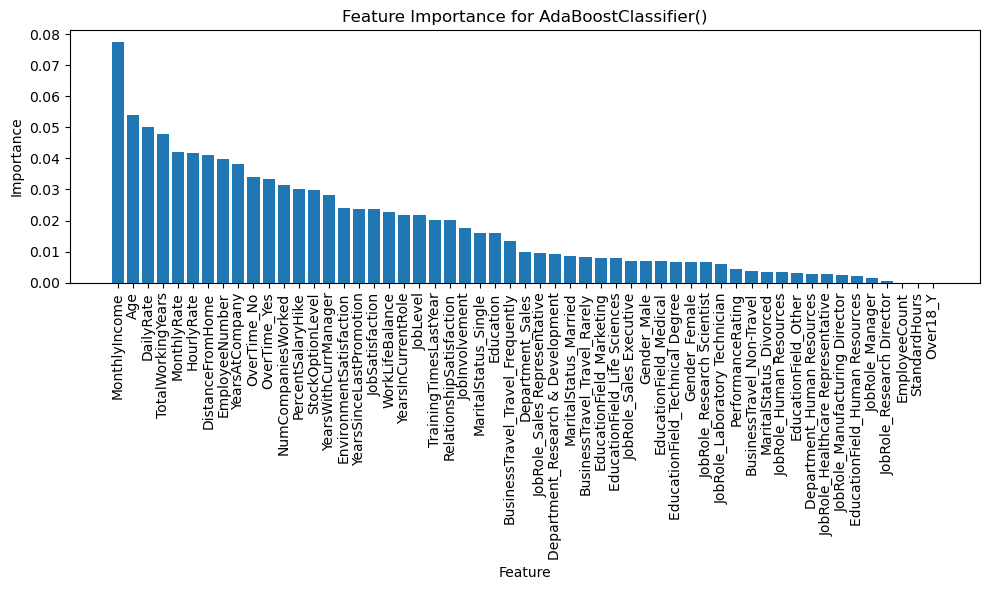

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importance for {model2}')
plt.tight_layout()
plt.show()

In [36]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to features X and target y
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled.value_counts())

Original class distribution:
 Attrition
0    1233
1     237
Name: count, dtype: int64
Resampled class distribution:
 Attrition
1    1233
0    1233
Name: count, dtype: int64


In [37]:
#Splitting into Train and Test dataset in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size = 0.8, random_state = 42)
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1972, 55)
Shape of X Test:  (494, 55)
Shape of y Train:  (1972,)
Shape of y Test:  (494,)


In [38]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [39]:
acc = accuracy_score(y_test,y_pred)
class_report = classification_report(y_true=y_test,y_pred=y_pred)
c_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)

print(f"Accuracy score for Random Forest Classification is {acc}")
print(f"classification report for Random Forest Classifier is\n{class_report}")
print(f"Confusion matrix \n{c_matrix}")

Accuracy score for Random Forest Classification is 0.9352226720647774
classification report for Random Forest Classifier is
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       250
           1       0.97      0.89      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494

Confusion matrix 
[[244   6]
 [ 26 218]]


In [40]:
# Plot feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                              Feature  Importance
53                        OverTime_No    0.129853
18                   StockOptionLevel    0.052340
11                      MonthlyIncome    0.045820
10                    JobSatisfaction    0.037470
50              MaritalStatus_Married    0.031830
35             EducationField_Medical    0.031266
8                      JobInvolvement    0.030199
6             EnvironmentSatisfaction    0.029492
0                                 Age    0.028899
9                            JobLevel    0.028857
5                      EmployeeNumber    0.028404
12                        MonthlyRate    0.028067
49             MaritalStatus_Divorced    0.027275
30  Department_Research & Development    0.026890
1                           DailyRate    0.026814
19                  TotalWorkingYears    0.026040
25               YearsWithCurrManager    0.025409
2                    DistanceFromHome    0.024031
23                 YearsInCurrentRole    0.023387


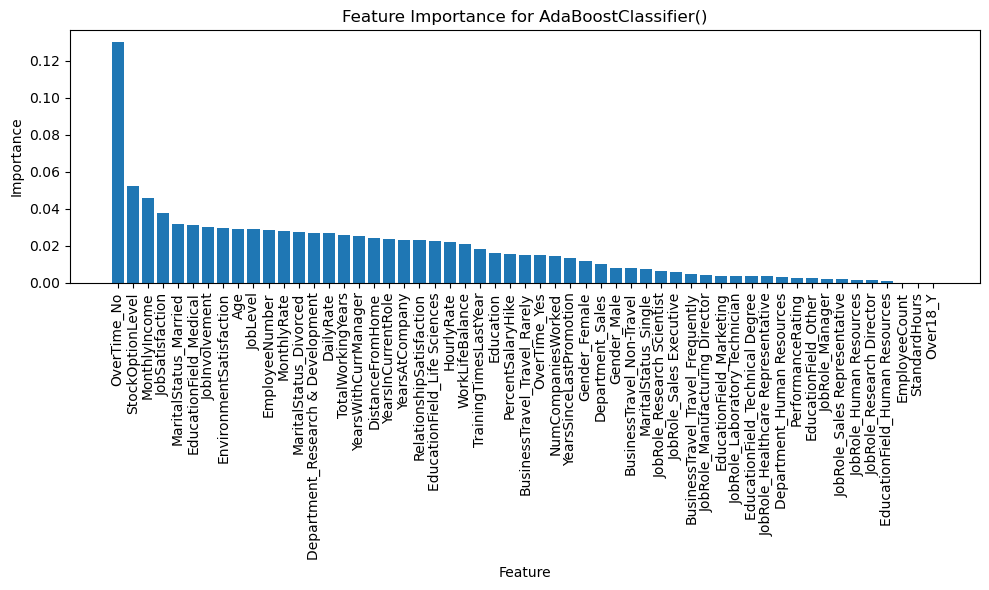

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f'Feature Importance for {model2}')
plt.tight_layout()
plt.show()